#### 말뭉치

In [1]:
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\윤성현\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\윤성현\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\윤성현\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


#### 토큰화 & 정규화

##### step 1: 토큰화

In [10]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

##### step 2. 어간 추출

In [14]:
# 원시적이나 빠른 방식
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print('Porter Stemmer   :', [st1.stem(w) for w in words])
print('Lancaster Stemmer:', [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


##### step 3. 표제어 추출

In [15]:
# 성능이 좋으나 시간이 많이 소요되는 방식
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
[lm.lemmatize(w, pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

##### step 4. 품사 부착

In [20]:
from nltk.tag import pos_tag

sentence = 'Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list    # 최종 결과물은 튜플의 리스트

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [22]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

##### step 5. 불용어

In [26]:
from nltk.corpus import stopwords

stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

#### Text 클래스 (빈도 분석)

##### step 1. 클래스 객체 생성

In [27]:
from nltk import Text

text = Text(word_tokenize(emma_raw))

##### step 2. 단어 빈도 그래프

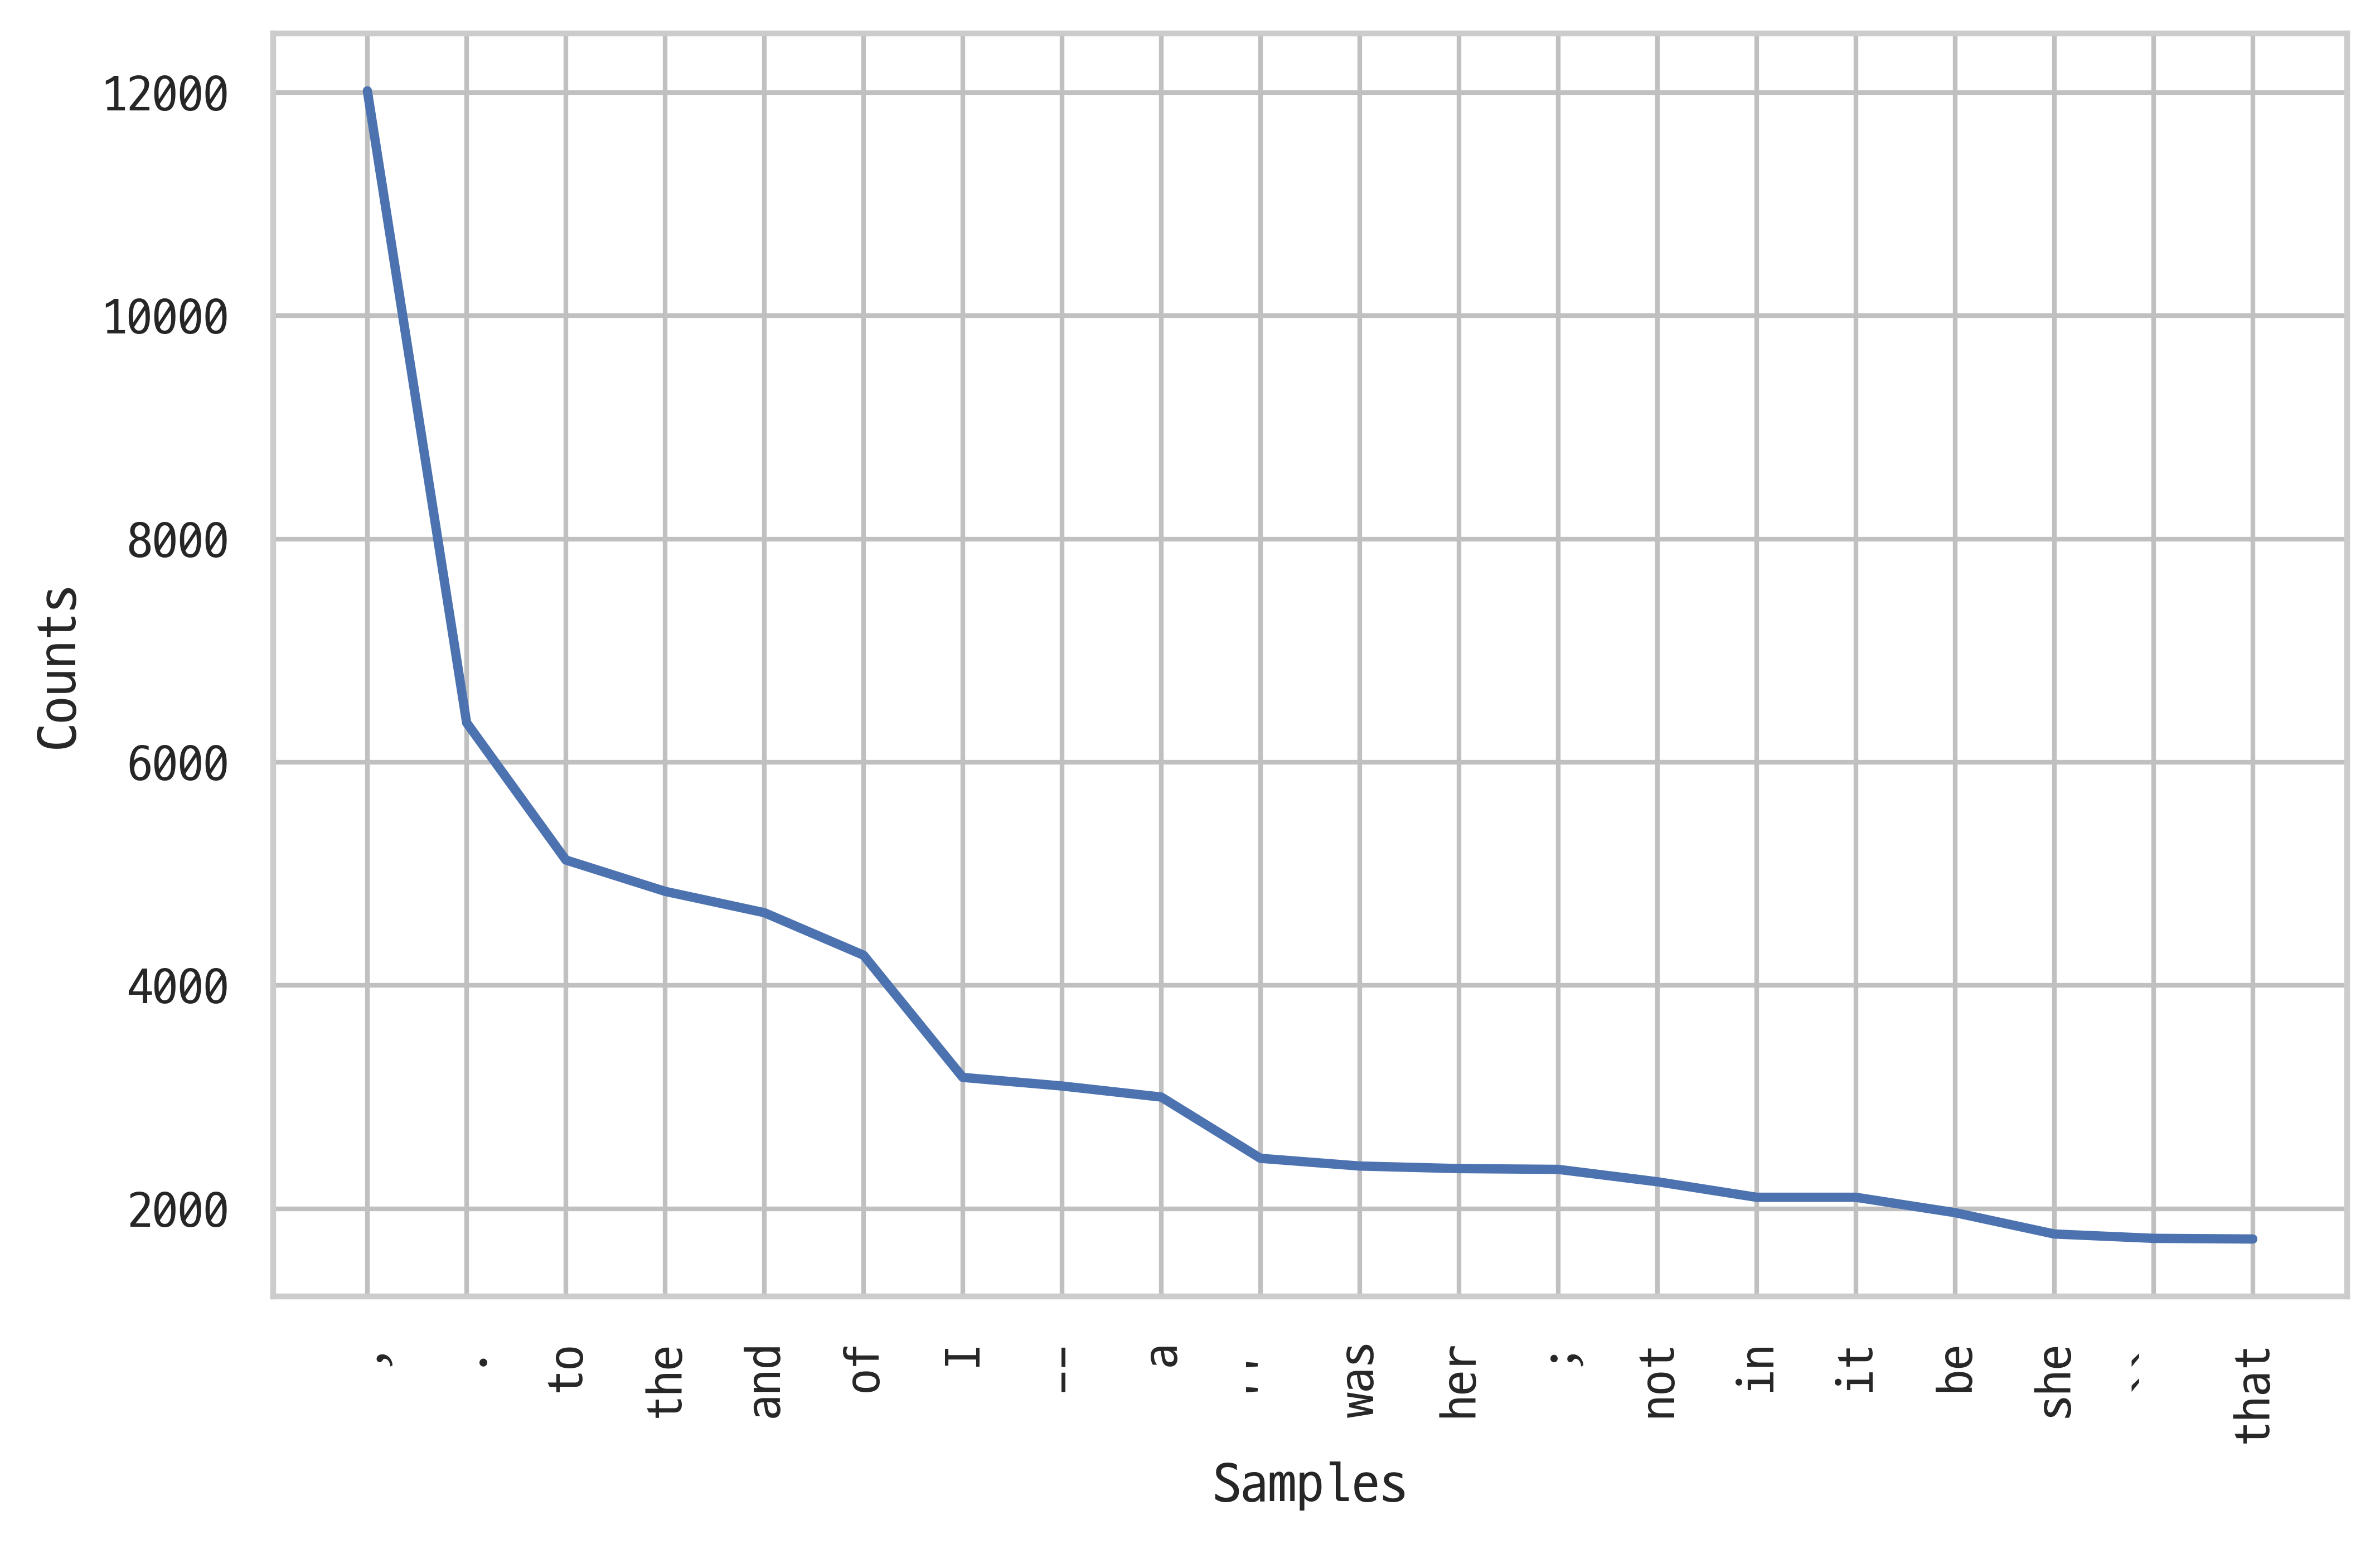

In [28]:
text.plot(20)
plt.show()

##### step 3. 단어 위치 그래프

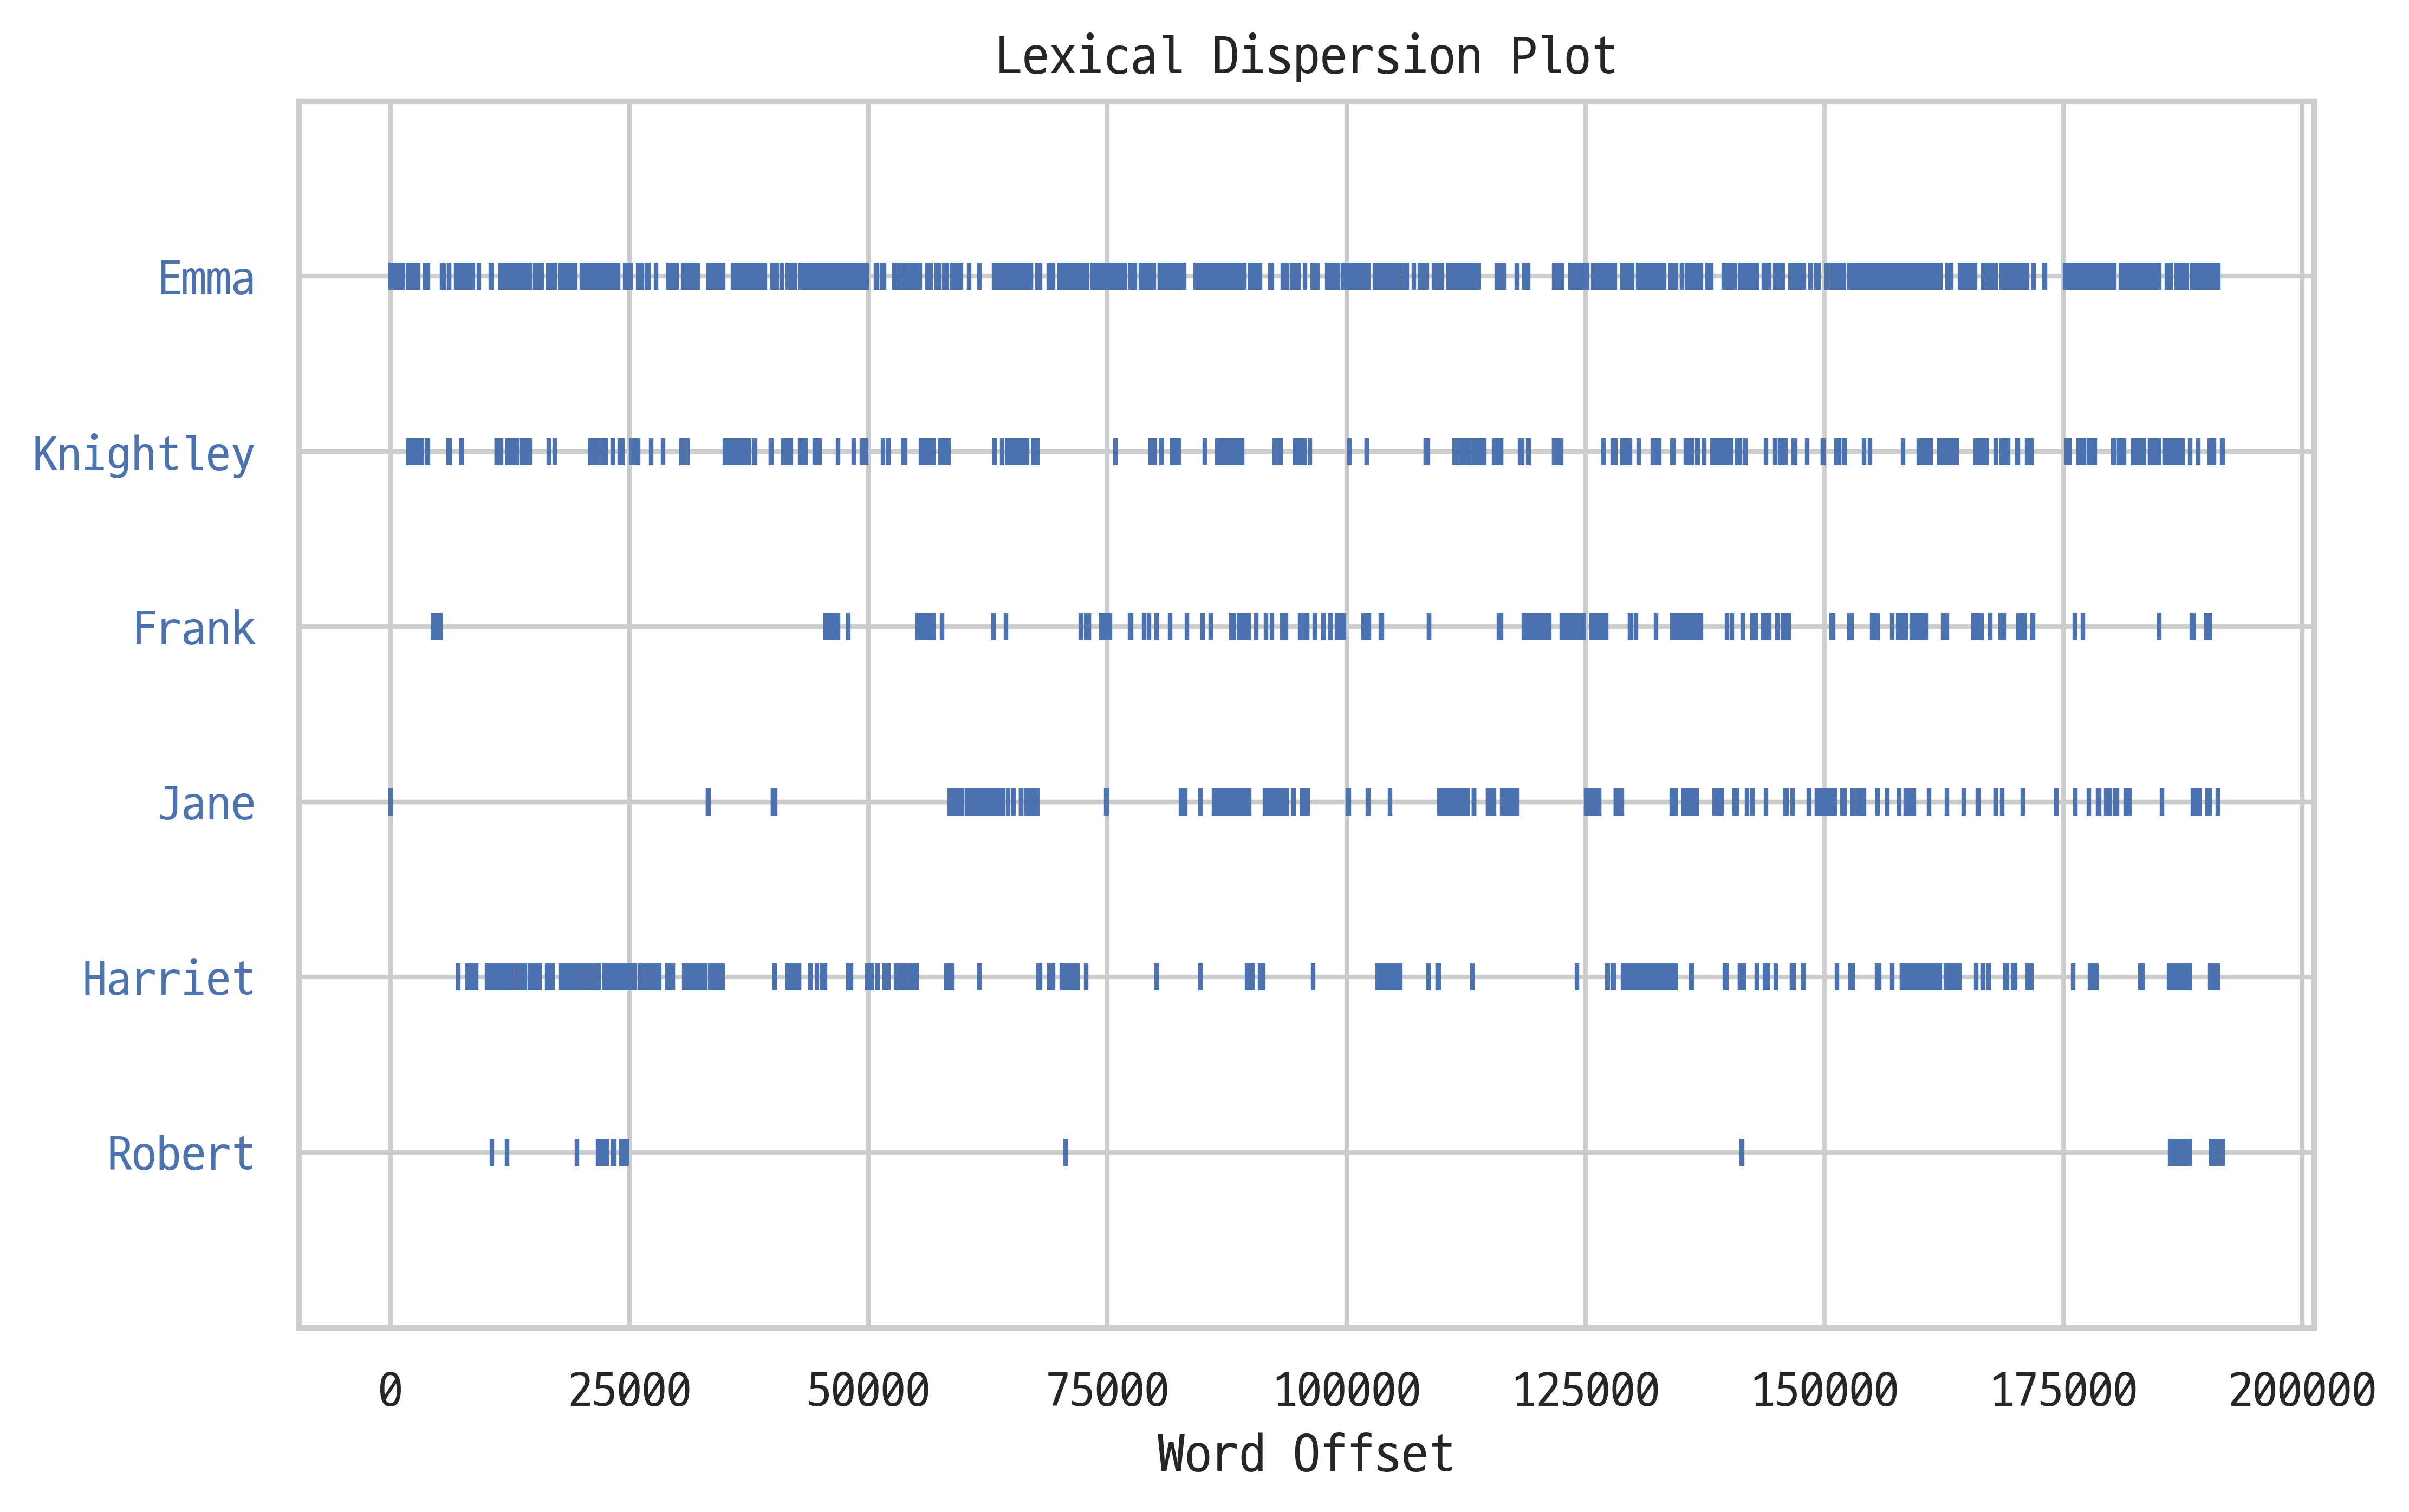

In [29]:
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])

#### step 4. 단어 문맥 인쇄

In [37]:
text.concordance('Emma')

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

##### step 5. 유사 단어 검색

In [44]:
text.similar('Emma', 1)

she


##### step 6. 공통 문맥 인쇄

In [41]:
text.common_contexts(['Emma', 'she'], 1)

but_was


#### FreqDist 클래스

##### step 1. Text 클래스에서 생성

In [46]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

##### step 2. 토큰 리스트에서 생성

In [47]:
from nltk import FreqDist

stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear']
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

##### step 3. 단어 빈도 분석

In [48]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

In [49]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

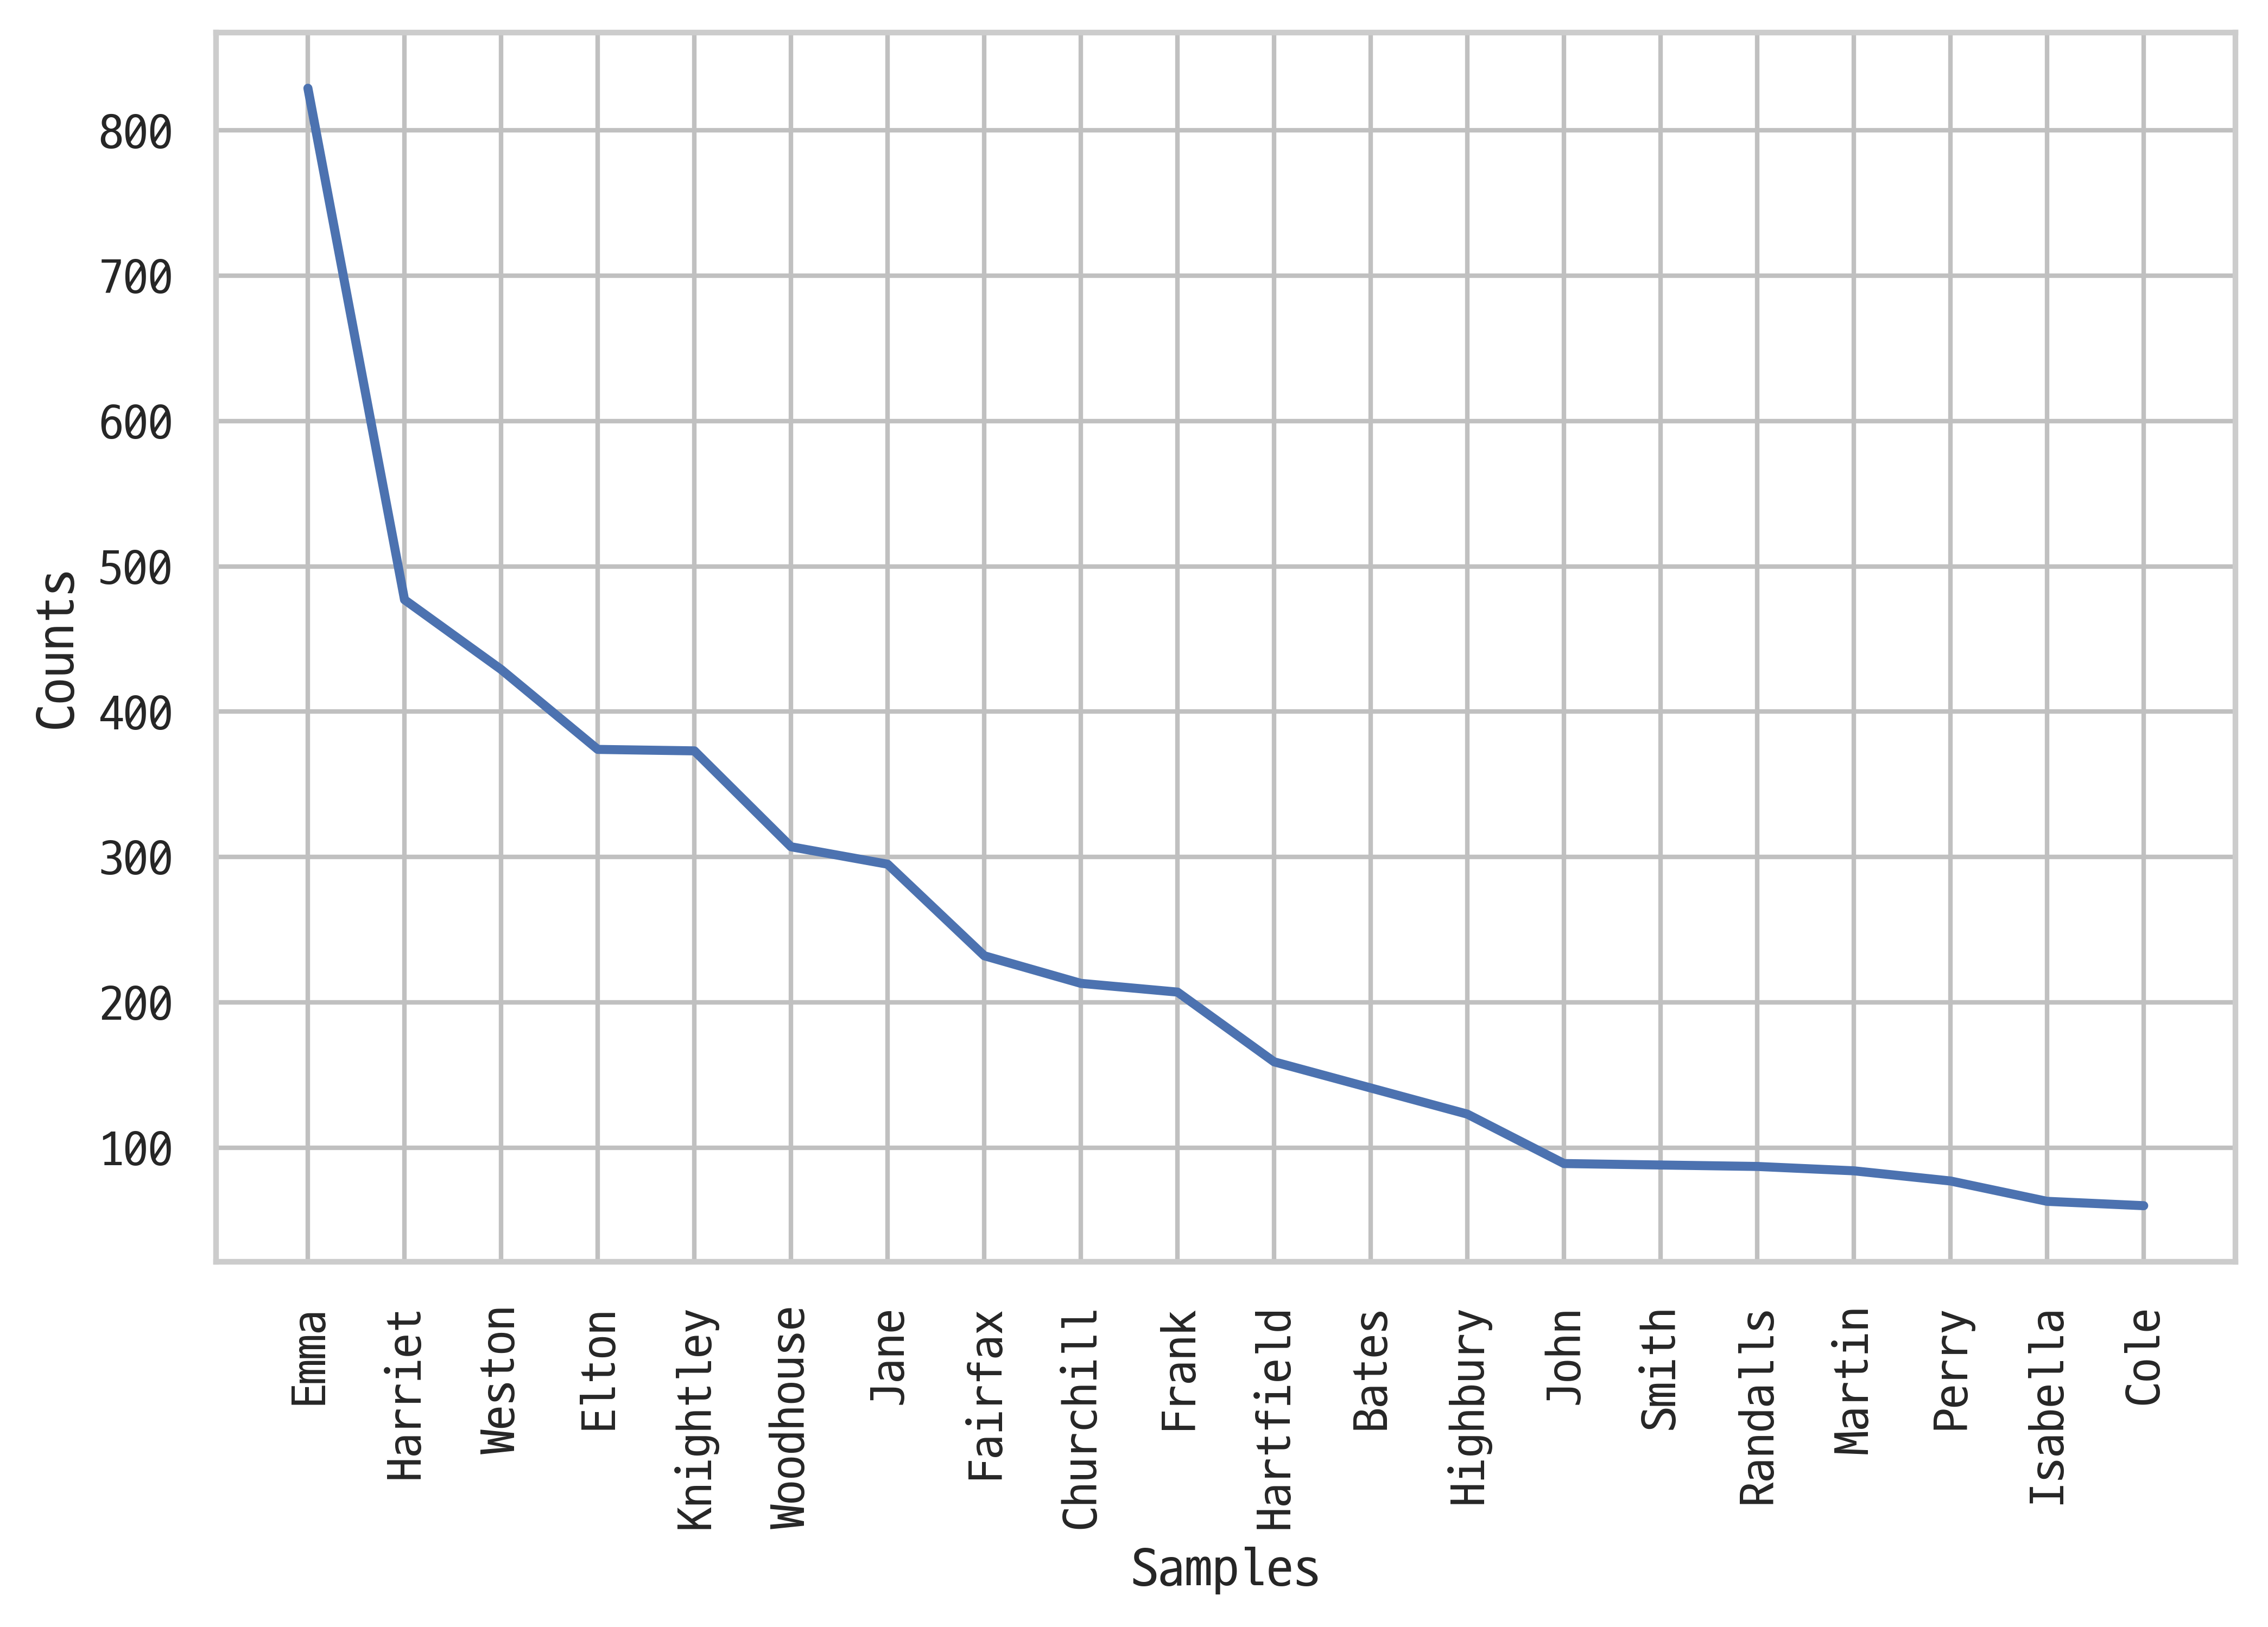

In [50]:
fd_names.plot(20)
plt.show()

#### 워드클라우드

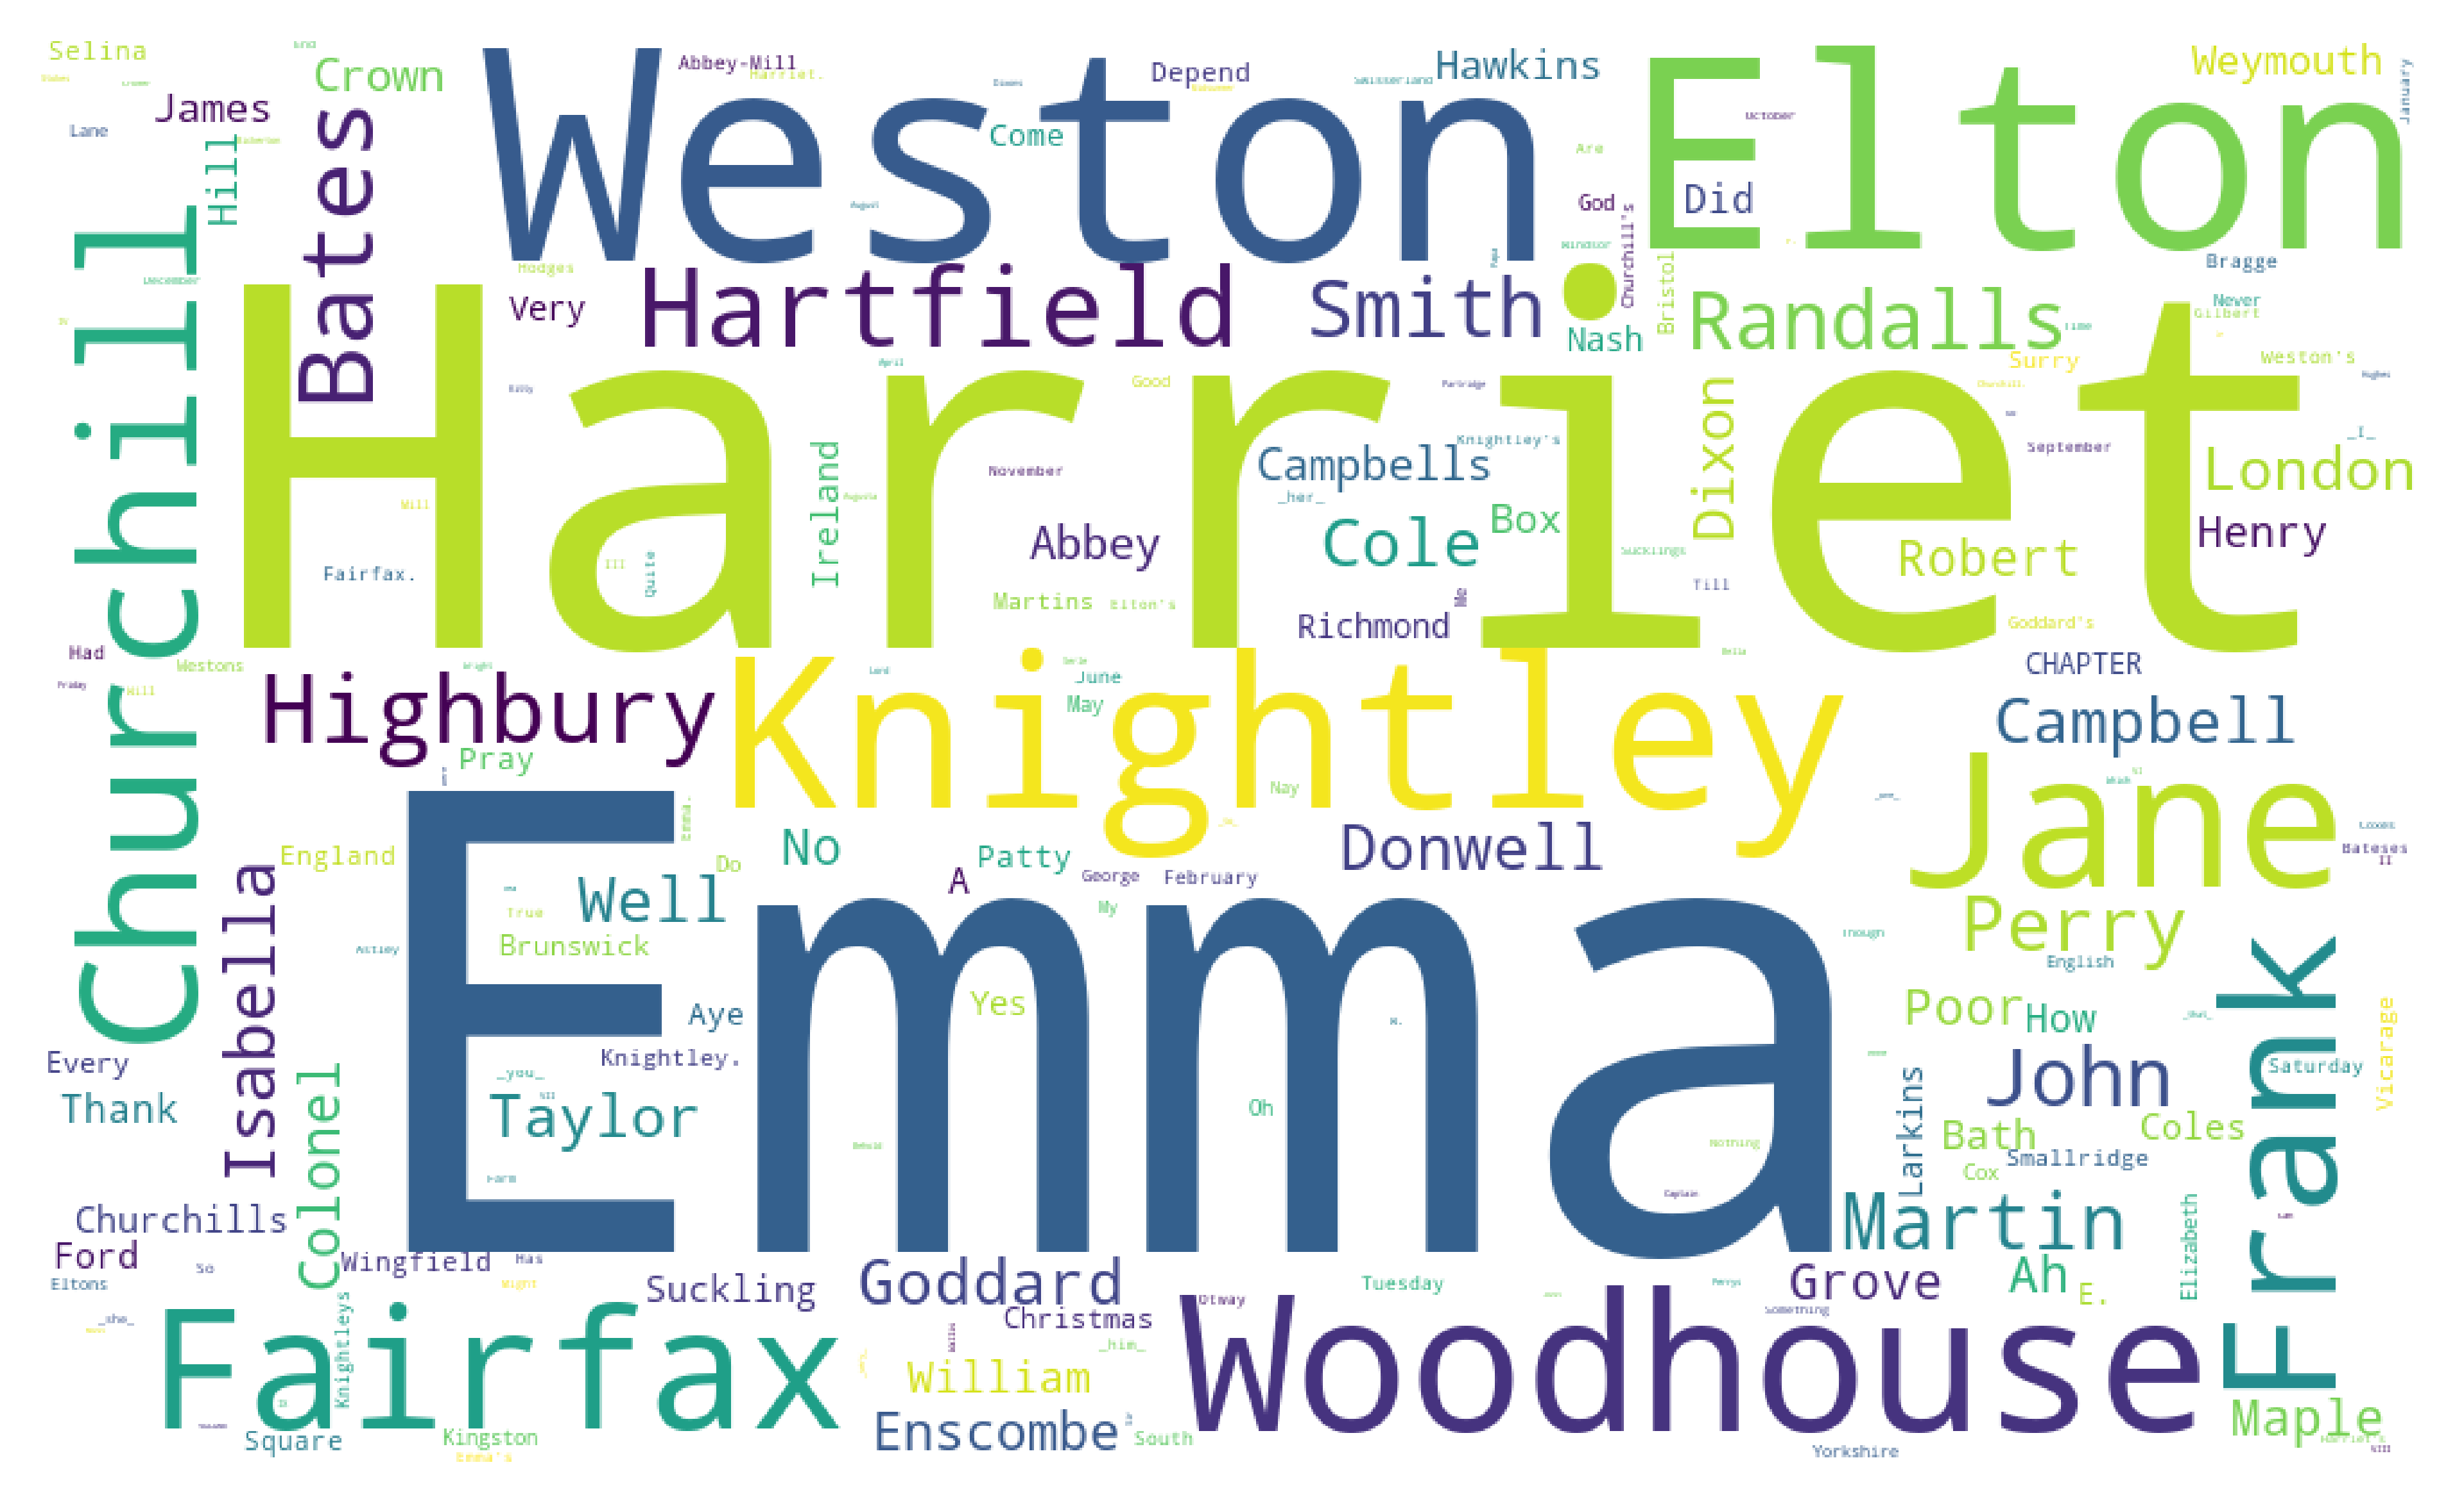

In [51]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

#### 연습 문제: 소설 등장인물 이름 워드클라우드 제작

In [56]:
"""구텐베르크 프로젝트의 소설 말뭉치 중 하나를 골라서 등장인물 이름의 빈도 플롯과 워드클라우드를 제작하라"""
kjv_raw = nltk.corpus.gutenberg.raw('bible-kjv.txt')

stopwords = ['O', 'Behold', 'Thou']
kjv_tokens = pos_tag(word_tokenize(kjv_raw))
kjv_names_list = [t[0] for t in kjv_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_kjv_names = FreqDist(kjv_names_list)

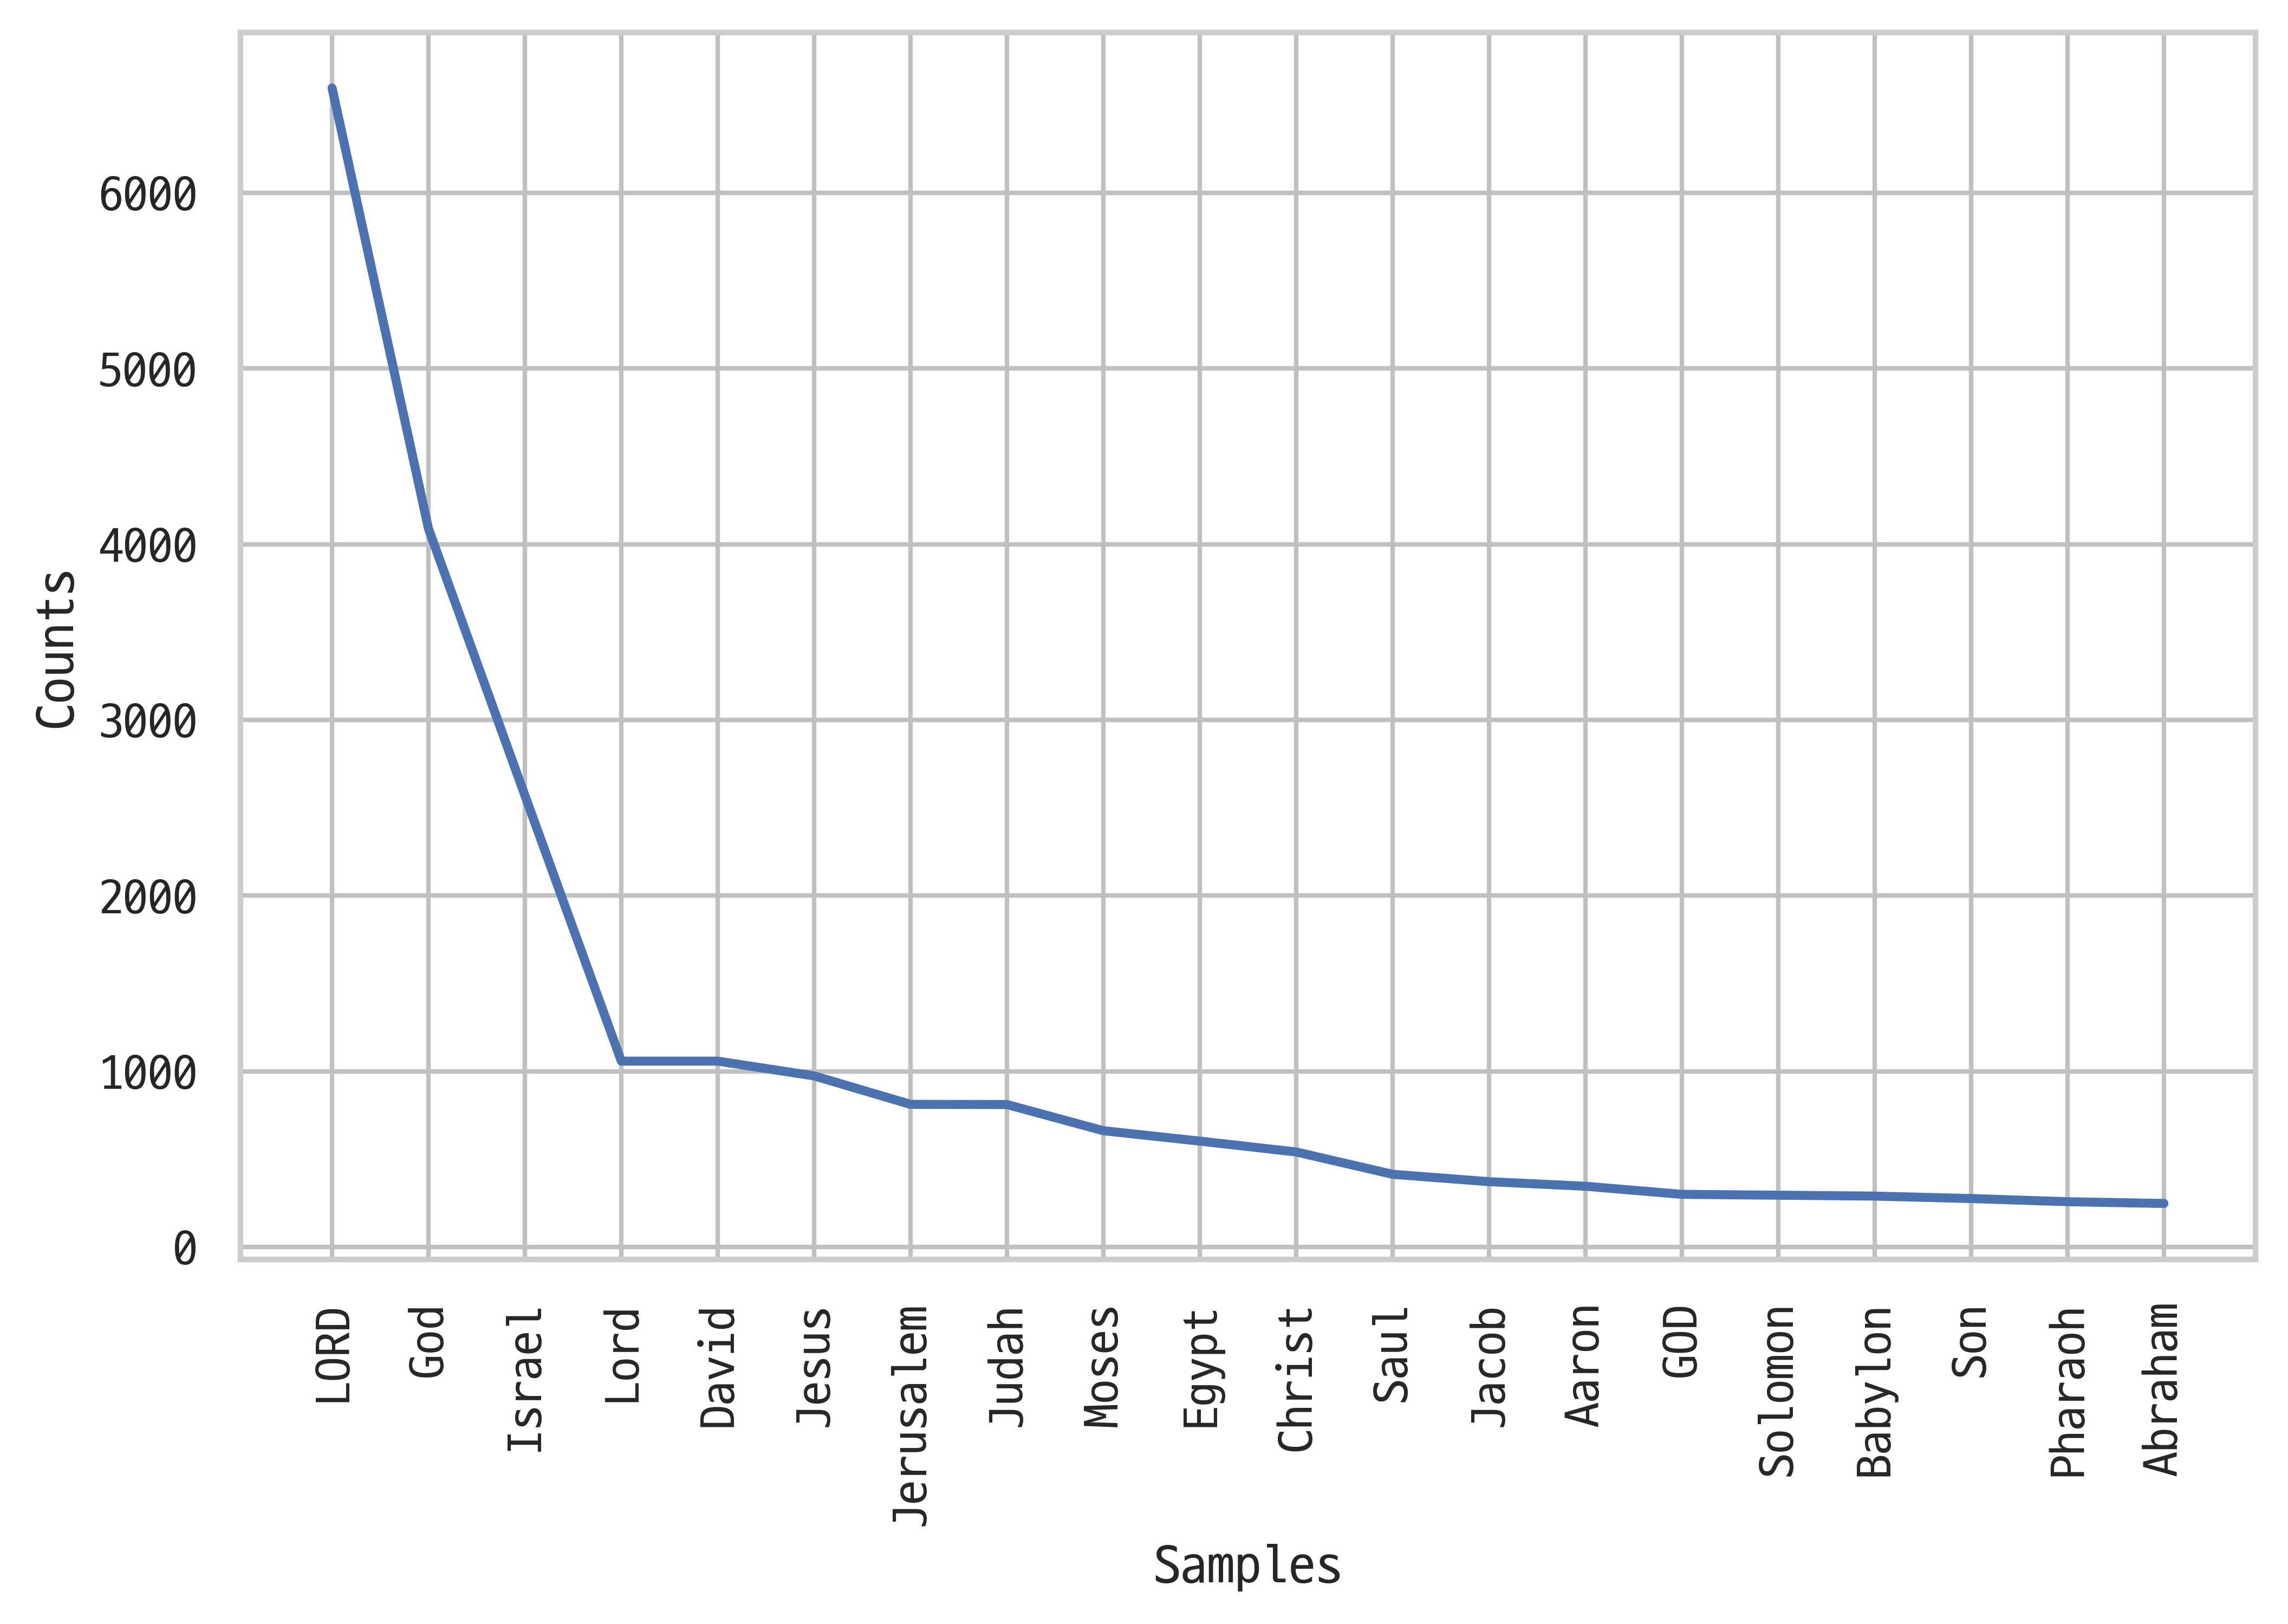

In [57]:
fd_kjv_names.plot(20)
plt.show()

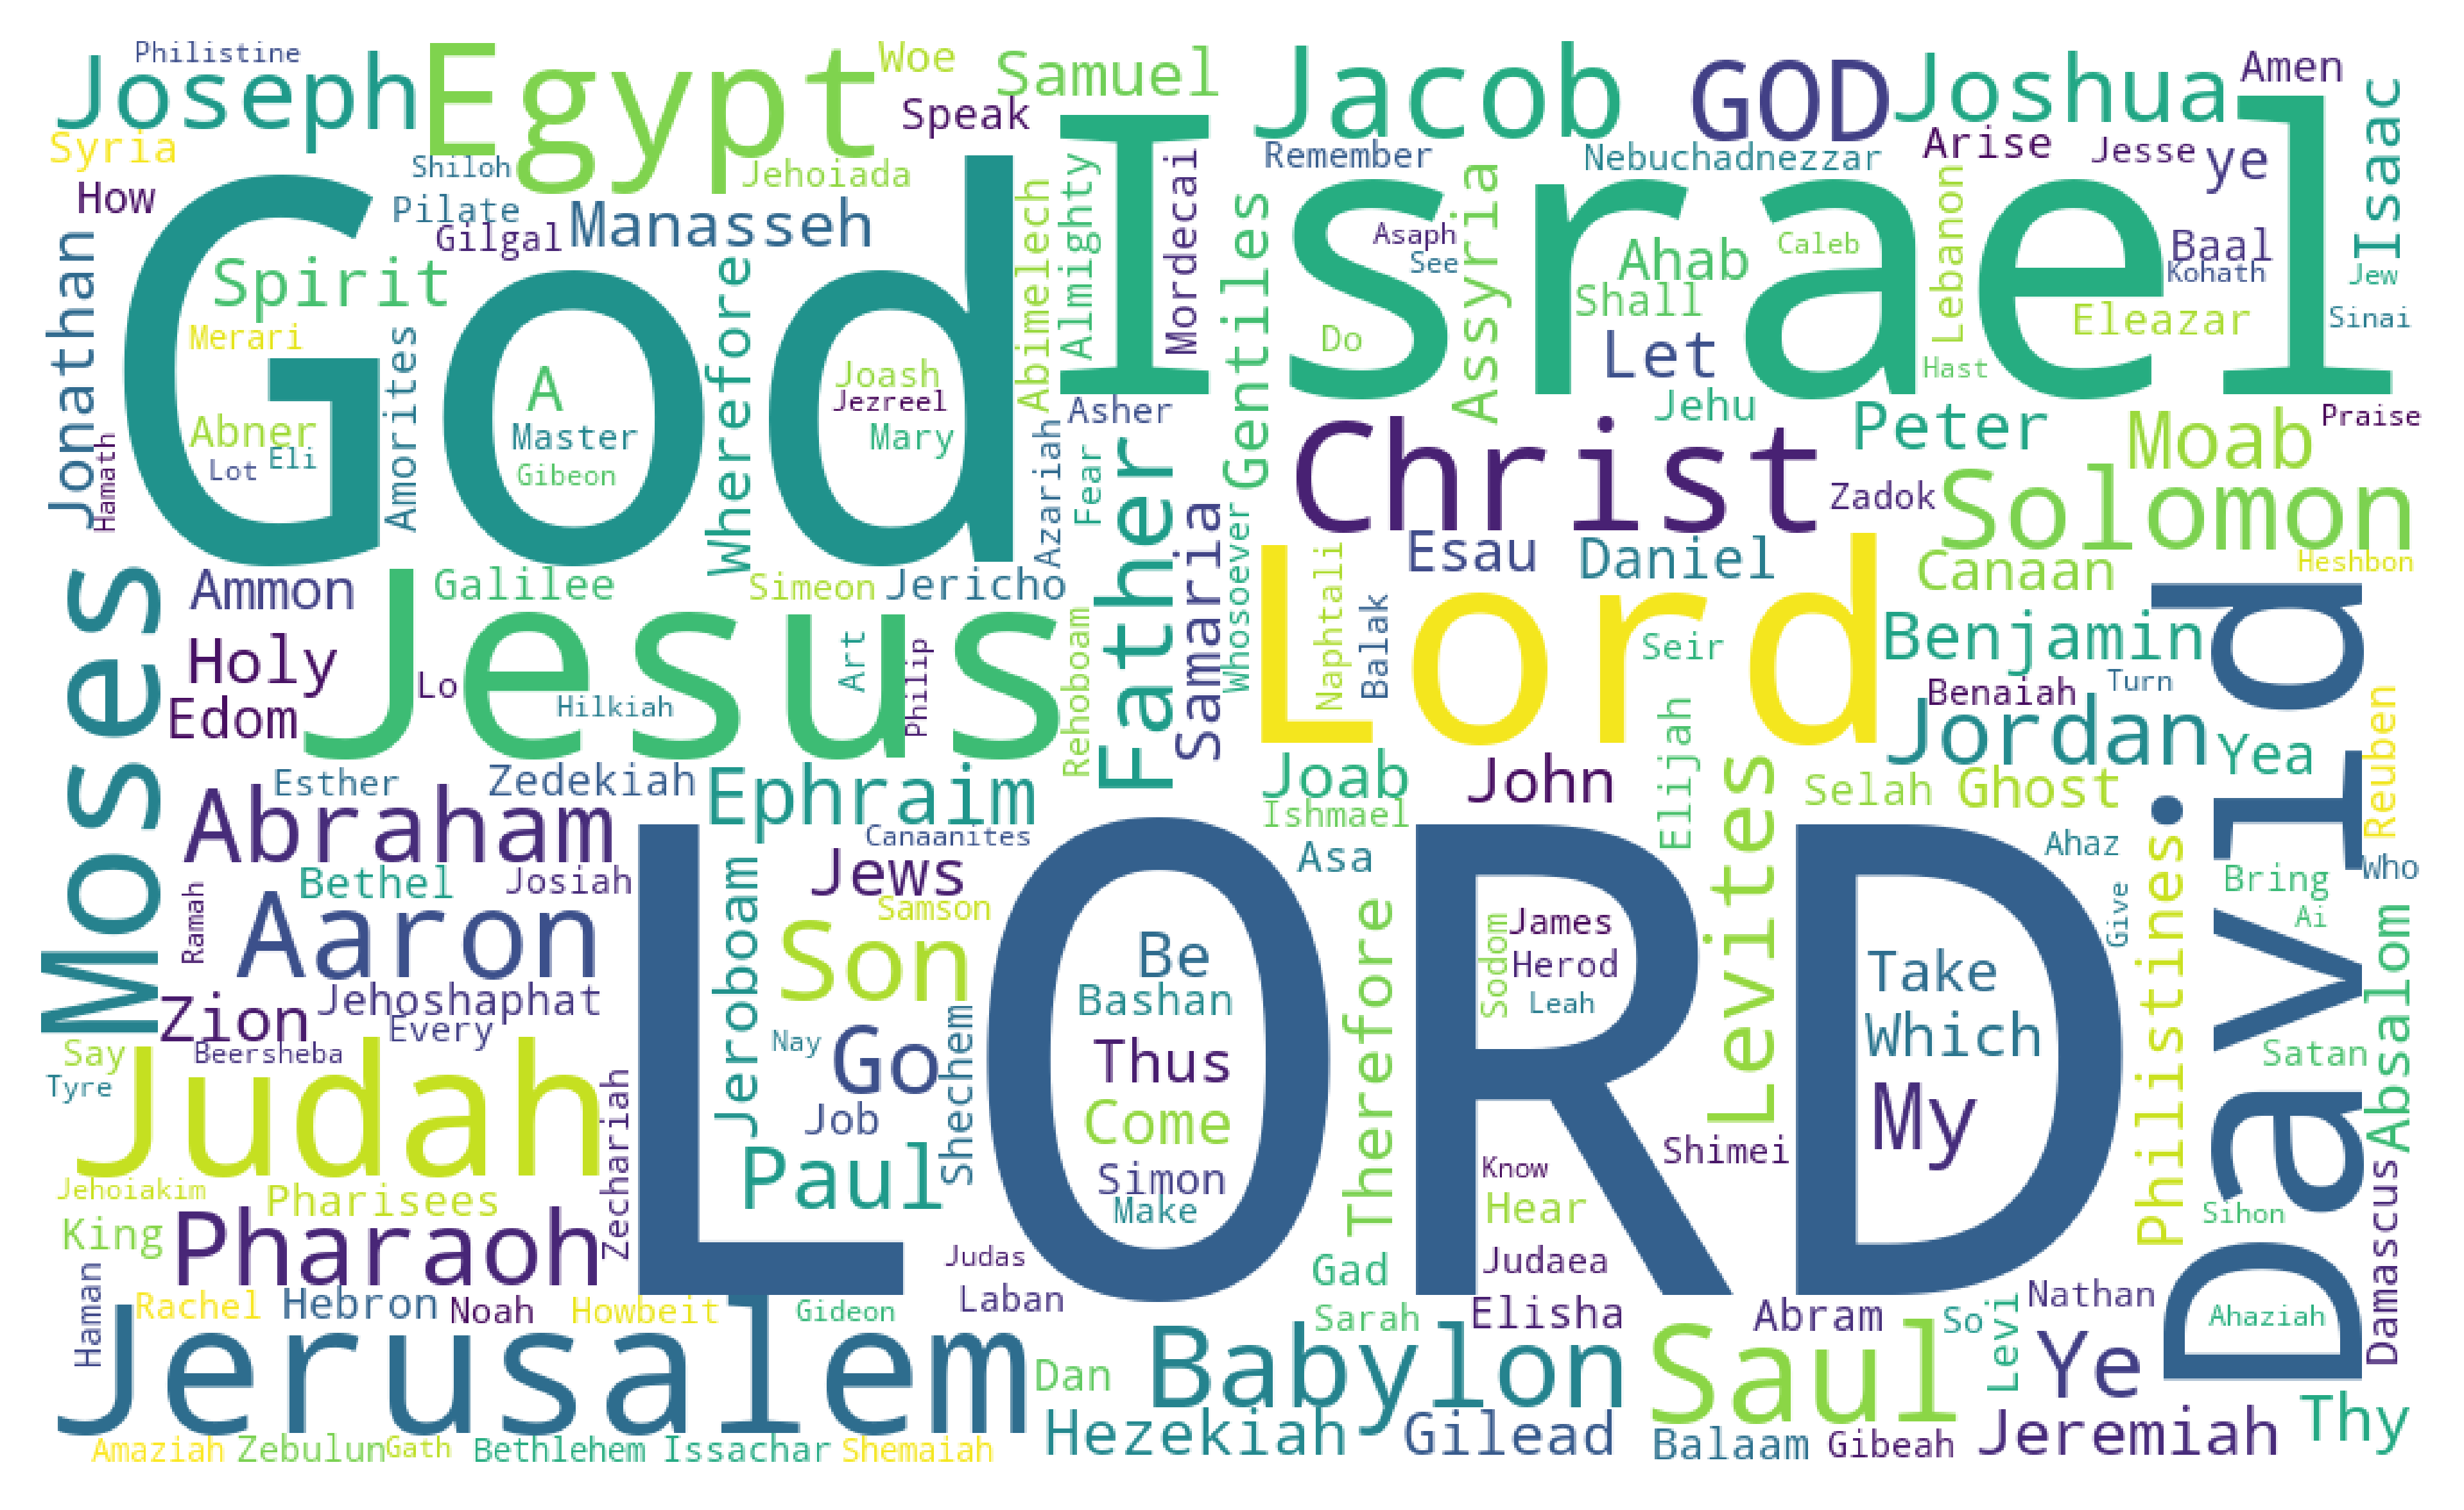

In [58]:
wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_kjv_names))
plt.axis('off')
plt.show()